<table align="center" width=100%>
    <tr>
        <td align="left" width="30%">
            <img src="download (2).jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21688C" size=20px>
                    <b>Unsupervised learning on 'Country Dataset'
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>



## Objective :

#### Clustering the Countries data using Unsupervised Learning and dimensionality reducation.

We tried to analyze country profiling data using various clustering techniques.

The following types of unsupervised techniques are used:

- K-Means Clustering Clustering

- Hierarchical (Agglomerative) Clustering

- DBSCAN (Density Based) Clustering

For Dimensionality Reduction:

- PCA Decomposition

## Problem Statement:
<table align="left" width=25%>
    <tr>
        <td align="left" width="30%">
            <img src="globe.jpg">
        </td>        
    </tr>
</table>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
The CEO of the NGO needs to decide how to use money strategically and effectively. 

**Hence the role is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. The motive of clustering the countries here is to help international NGOs to decide how much money they need to spend on different countries for their development by making a list of under-developing,developing and developed countries by doing clustering analysis.**

## Importing Required Libraries:

In [64]:
# importing numpy 
import numpy as np

# importing pandas
import pandas as pd

# importing seaborn for visualization
import seaborn as sns

# importing matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import plotly for graphs
import plotly
import plotly.express as px

# initializing the plot size
plt.rcParams['figure.figsize'] = [12,6]

# importing package for preprocessing the data to standard scalar
from sklearn.preprocessing import StandardScaler

# importing package for clurtering
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

# importing package for silhouette_score
from sklearn.metrics import silhouette_score,silhouette_samples,accuracy_score

# importing package for heirarchical clustering
from scipy.cluster.hierarchy import  dendrogram, cophenet, linkage

# importing package for euclidean distance
from sklearn.metrics.pairwise import euclidean_distances

# importing package for nearest neihbours
from sklearn.neighbors import NearestNeighbors


from scipy.spatial.distance import pdist

# importing package for PCA
from sklearn.decomposition import PCA

# importing packing for ignoring warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Dataset Description:

**country**: Name of the country.

**child_mort**: Death of children under 5 years of age per 1000 live births.

**exports**: Exports of goods and services per capita. Given as %age of the GDP per capita.

**health**: Total health spending per capita. Given as %age of GDP per capita.

**imports**: Imports of goods and services per capita. Given as %age of the GDP per capita.

**Income**: Net income per person.

**Inflation**: The measurement of the annual growth rate of the Total GDP.

**life_expec**: The average number of years a new born child would live if the current mortality patterns are to remain the same.

**total_fer**: The number of children that would be born to each woman if the current age-fertility rates remain the same.

**gdpp**: The GDP per capita. Calculated as the Total GDP divided by the total population.

### Reading Data File:

In [65]:
country_df = pd.read_csv('Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Printing the number of rows and columns:

In [66]:
country_df.shape

(167, 10)

**Interpretation**: From the above output we can say that there are 167 rows and 10 columns.

### Summary of the dataFrame

In [67]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Interpretation**: Do not require any type conversion of Datatypes.

### Finding missing values in dataset:

In [68]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Interpretation**: From the above output we can conclude that there are no missing values the in data.

## Descriptive statistics:

In [69]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Interpretation**:The above summary the description of 167 countries shows that:

Death rate of children under 5 years is between 2-208 for 1000 live births. Average is 38.27

Export ranges between 0.1-200% and  Import ranges between 0.06% to 174% of GDP per capita.
Average exports of goods and services per capita: 41.11 and average imports of goods and services per capita: 46.89 
(which is > avg. exports)

Spending on health per capita is between 1.8%  to 17.9% of GDP.

Net income per person is 609-125000 dollars. Average net income per person: 17144.69
Average inflation: 7.78 (has a wide spread ranging from min -4.21 to 104 % of GDP) 

Life expectancy i,e the number of years a new born child would live ranges between 32 to 82 years. Average life expectancy: 70.56 

Average number of children that would be born to each fertile-woman is between 1-3, and 7 counts in extreme cases.

Total GDP divided by the total population is GDPP is observed between 231 - 105000 billion dollars. Average GDP per capita: 12964.15 billion dollars


### Converting the country column to index:

In [70]:
#number of unique countries
country_df['country'].nunique()

167

**Interpretation**: We found 167 number of unique countries present in our dataset hence there can be no duplicates of records.

In [71]:
country_df.set_index('country',inplace=True)
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Interpretation**: We have set Country names as Index column as it is the only categorical parameter. "Country" is a feature which is not required here for unsupervised learning. 

### Outliers detection:

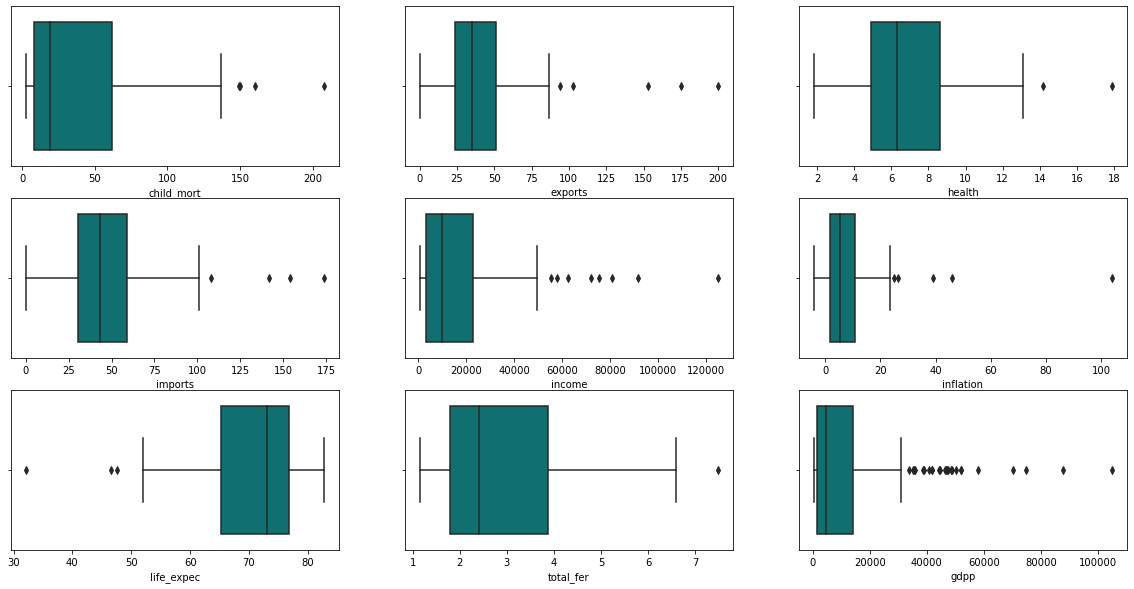

In [72]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 10))

for variable, subplot in zip(country_df.columns, ax.flatten()):
      sns.boxplot(country_df[variable], ax = subplot, color='teal')
plt.show()

**Interpretation**: From the above plot we can observe that there are some features with outliers. And these ourliers are prominent factors to decide socia-economic condition of the country.

Since, there are very less number of rows of data we will not be removing the outliers.

### Correlation between the features:

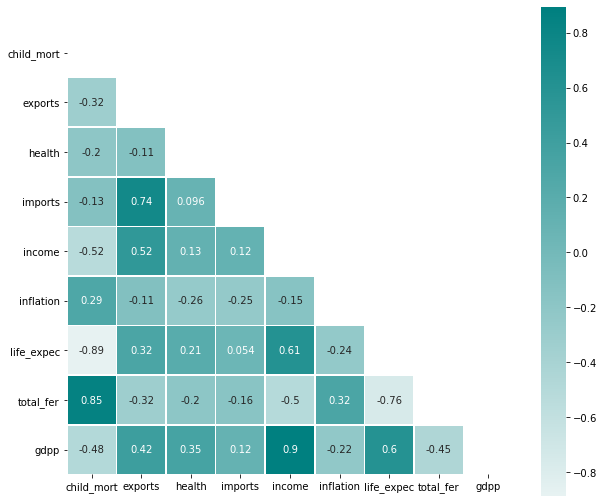

In [73]:
corr = country_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.light_palette('Teal', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None,center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

**From above we can conclude that:**

gdpp and income,imports and exports and total_fert are highly positive correlated
whereas life_expec and child_mort are highly negative correlated.


**Interpretaion**:

- Child Mortality has a perfect negative correlation with Life Expectancy

- Total Fertility has somewhat positive correlation with Child Mortality

- Exports and Imports have rough positive correlation

- Income and GDPP have fairly positive correlation

### Data Visualization:

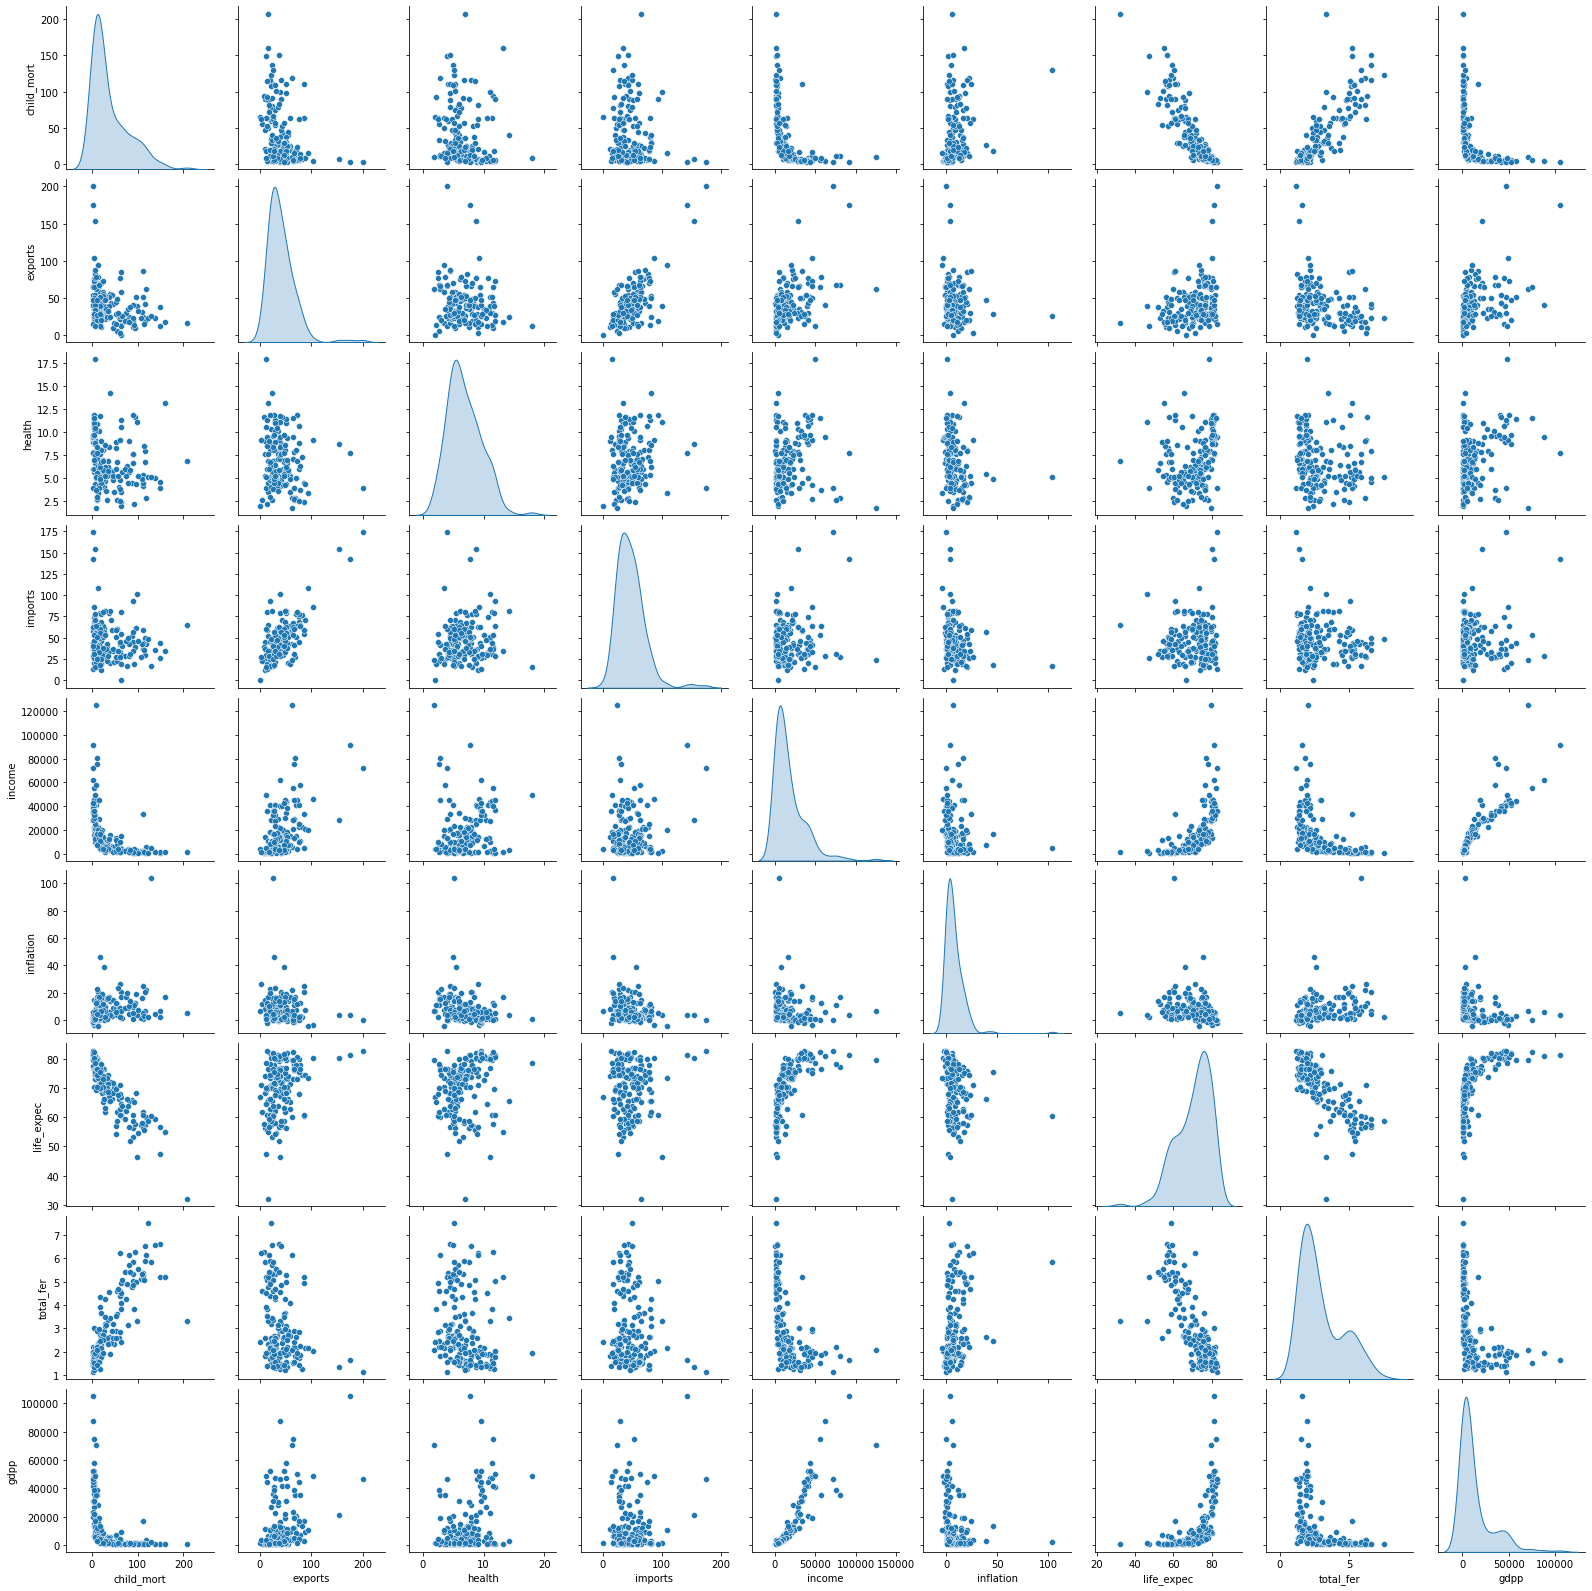

In [74]:
sns.pairplot(data=country_df,diag_kind='kde')
plt.show()

**Interpretation**:We can observe very close positive correlation between "Income" and "GDPP". Also, "Exports", "Imports", "Health" have sort of positive correlation with "GDPP". Exports bring money into the country, which increases the exporting nation's GDP. The money spent on imports leaves the economy, and that decreases the importing nation's GDP.

Income rises with exports which might be because people generate income by generating goods and services which are later exported.



### Data Standardization:

Scaling data is necessary for the algorithms which is based on the distance like K-means clustering and Hierarchical clustering.

StandardScaler transform the data such that the mean will be 0 and variance will be 1.


In [75]:
ss = StandardScaler()

scaled_df = ss.fit_transform(country_df)
X = pd.DataFrame(scaled_df,columns=country_df.columns,index = country_df.index)

X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


**Interpretation**: From the above output we can observe that the data is transformed with mean zero and standard deviation 1.

----------------------------------------------------------------------

# PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.

In [76]:
pca = PCA()
pcdata = pca.fit_transform(X)

In [77]:
pca_df = pd.DataFrame(pcdata)
pca_df.head()

,0,1,2,3,4,5,6,7,8
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270


In [78]:
a = np.cumsum(pca.explained_variance_ratio_)
a

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

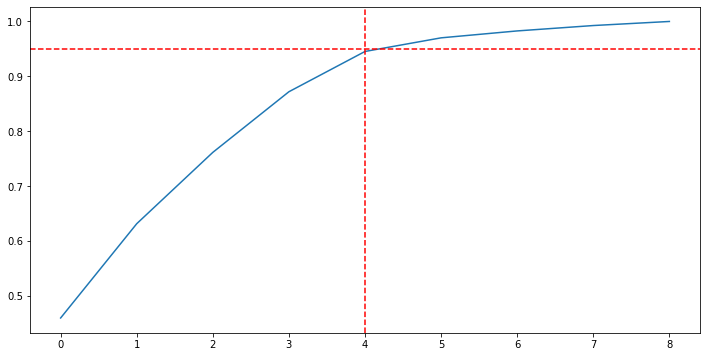

In [79]:
plt.plot(a)
plt.axhline(y=0.95,c='r',ls='--')
plt.axvline(x=4,c='r',ls='--')
plt.show()

**Interpretation:**
Looks like 5 components are enough to describe 95% of the variance in the dataset.
We'll choose 5 components for our modeling

In [80]:
mypca = PCA(n_components=5)
pca5 = mypca.fit_transform(X)

In [81]:
pca5_df = pd.DataFrame(pca5,index=country_df.index)
pca5_df.head()

,0,1,2,3,4
country,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310
Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677
Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.156475
Angola,-2.932423,1.695555,1.525044,0.839625,-0.273209
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,-0.193007


**Interpretation**: For KNN clustering model building we will be using PCA data.

# K-Means Clustering

K-means clustering is an unsupervised machine learning technique used to identify clusters of data object in a dataset. K-means is centroid-based algorithm, or distance-based algorithm, where we calculate the distance to assign a point to a cluster.

K-means uses Euclidean distance.

To decide how many number of clusters to consider we use Elbow Curve method and silhouette score.

##### Calculating Within-Cluster-Sum-of-Square.

In [82]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 10)
    kmeans.fit(pca5_df)
    wcss.append(kmeans.inertia_)

### Optimal 'k' value using Elbow plot 

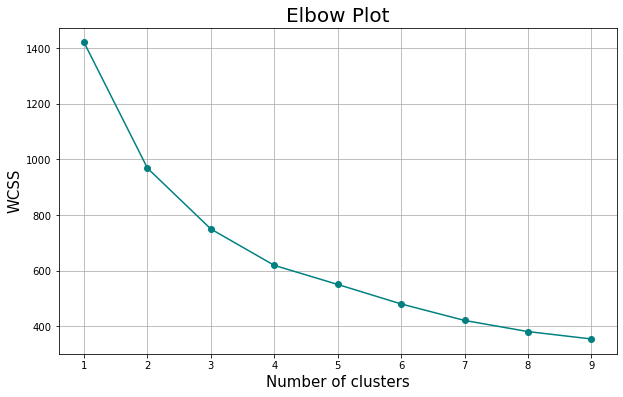

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss,marker="o",color="teal")
plt.title('Elbow Plot', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.grid(True)
plt.show()

**Interpretation**:In the above plot is the Elbow Curve where along y-axis is the Within-Cluster-Sum-of-Square and along x-axis is the number of clusters.

From the above graph we can see a bend at 2,3 and 4.

we can consider 3 or 4 clusters from the above observation. 

### Optimal 'k' value using Silhouette Score

The Silhouette Coefficient is calculated using:

the mean intra-cluster distance ( a ) for each sample

the mean nearest-cluster distance ( b ) for each sample

The Silhouette Coefficient for a sample is (b - a) / max(a, b)

In [84]:
n_cluster = [2,3,4,5,6]

for K in n_cluster:
    kmeans = KMeans(n_clusters=K,random_state=10)
    predict = kmeans.fit_predict(pca5_df)
    score = silhouette_score(pca5_df,predict,random_state=10)
    print("for {} clusters the silhouette score is {}".format(K,score) )

for 2 clusters the silhouette score is 0.30441994992318155
for 3 clusters the silhouette score is 0.3079769786519014
for 4 clusters the silhouette score is 0.32718347402877207
for 5 clusters the silhouette score is 0.24947155904197027
for 6 clusters the silhouette score is 0.2560819912957581


**Interpretation**: From the above silhouette score we can consider 4 as best number of clusters.

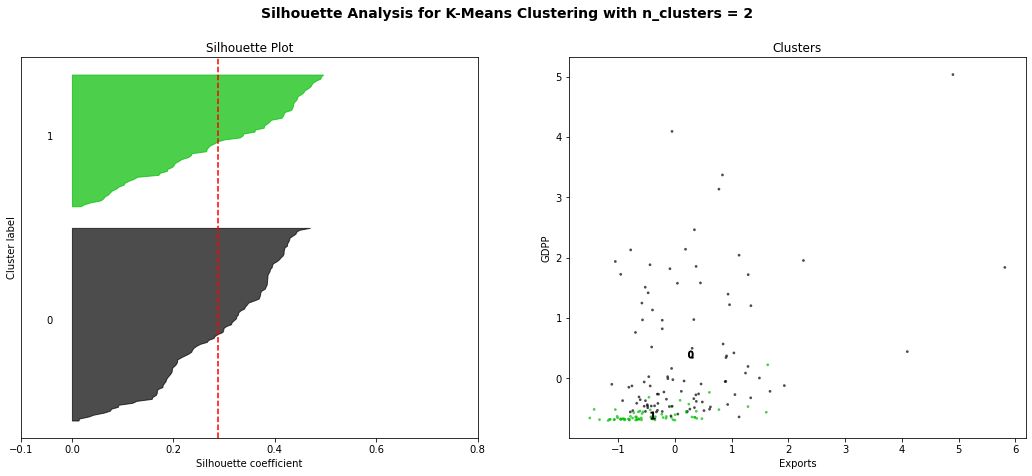

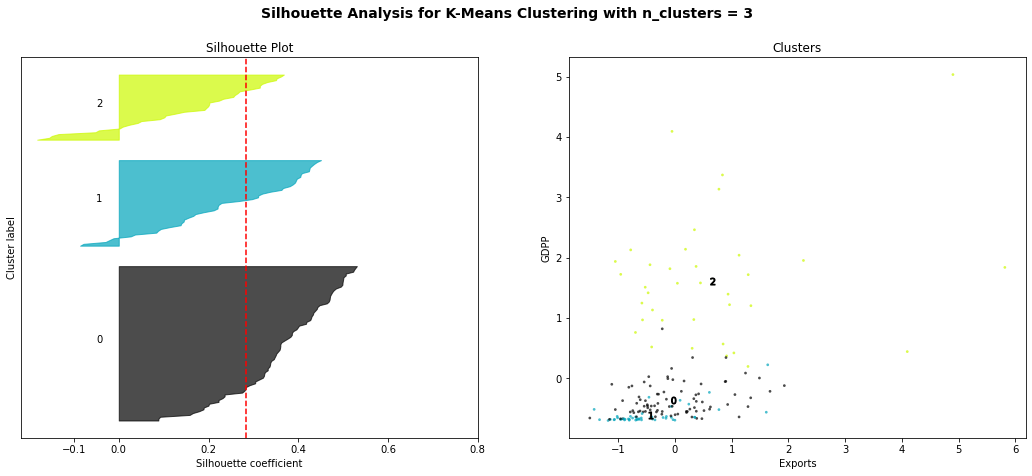

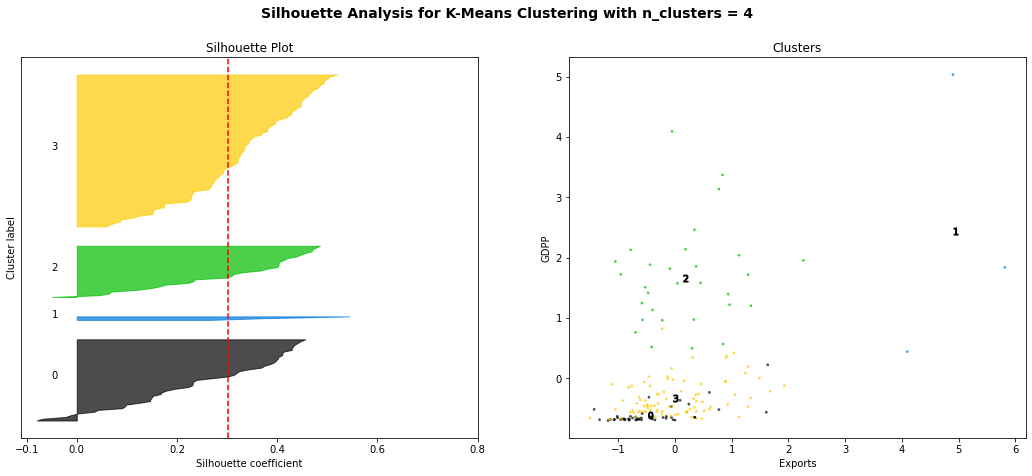

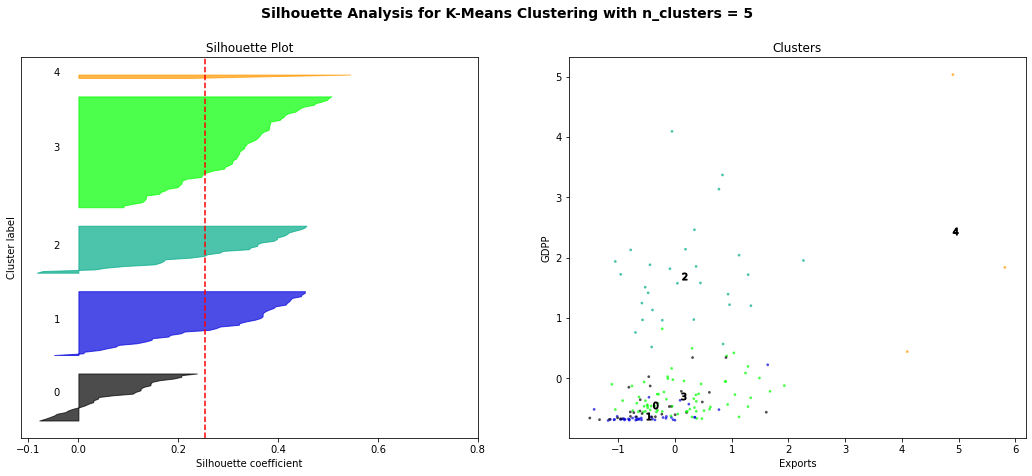

In [85]:
n_clusters = [2, 3, 4, 5]
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
   
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 1], X[:, 8], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[8], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Exports")
    ax2.set_ylabel("GDPP")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

**Interpretation**: 
From the above plotting we can consider number of clusters as 3, because we get a very prominent silhouette plot for no. of clusters = 3.


### Building model with number of clusters(k=3)

In [86]:
kmeans = KMeans(n_clusters = 3,random_state = 10)
kmeans.fit(pca5_df)

KMeans(n_clusters=3, random_state=10)

In [87]:
set(kmeans.labels_)

{0, 1, 2}

**Interpretation:** We can see each record has got a label among 0,1,2.

In [88]:
kmeans.cluster_centers_

array([[ 2.76977273, -0.21301421,  0.06888632,  0.86680107, -0.17822588],
       [-2.43461995,  0.41127566, -0.09616666,  0.69171004, -0.14145844],
       [ 0.17518237, -0.13882672,  0.02428483, -0.75851441,  0.15553189]])

In [89]:
country_kmeans_df = country_df.copy()

In [90]:
country_kmeans_df['clusters_pca'] = kmeans.labels_

In [91]:
country_kmeans_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_pca
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


## KMeans-Cluster Analysis:

In [92]:
country_kmeans_df['clusters_pca'].value_counts()

2    84
1    47
0    36
Name: clusters_pca, dtype: int64

Count of records for each clusters.

#### Analysis of all KMeans-Clusters 

In [93]:
country_kmeans_df.groupby(['clusters_pca']).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters_pca,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


### **Interpretation**:


Cluster 0 has low child mortality, high import and export, high gdp percapita, low inflation rate and high income.Average life expectancy is 80.

Cluster 1 has high child mortality, low import and export, low gdpp , high inflation rate and low income.Average life expectancy is 59.

Cluster 2 has mediumn child mortality, medium import and export, medium gdpp, medium inflation rate and medium income.Average life expectancy is 72.


From above we can conclude that:-

**Cluster 0 = developed country, Cluster 1 = under developings country, Cluster 2 = developing country.**

From Kmeans-clustering
- Number of developed countries 36

- Number of developing countries 84

- Number of under-developing countries 47

**47 Countries grouped in the cluster 1 needs the most economical support and development aid from NGO.**

### Comparing the Kmeans with and without PCA

In [94]:
kmeans = KMeans(n_clusters = 3,random_state = 10)
kmeans.fit(X)
country_kmeans_df['clusters_without_pca'] = kmeans.labels_

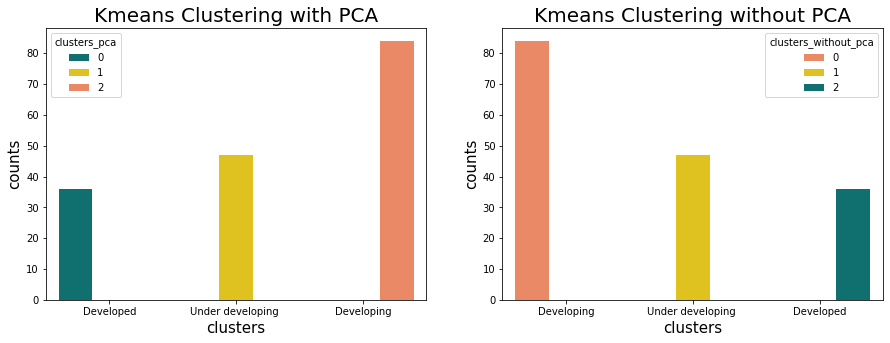

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=country_kmeans_df,x='clusters_pca',hue='clusters_pca',palette=['teal','gold','coral'])
plt.title('Kmeans Clustering with PCA',fontsize=20)
plt.xlabel('clusters',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.xticks(np.arange(3), ['Developed', 'Under developing ', 'Developing'])

plt.subplot(1,2,2)
sns.countplot(data=country_kmeans_df,x='clusters_without_pca',hue='clusters_without_pca',palette=['coral','gold','teal'])
plt.title('Kmeans Clustering without PCA',fontsize=20)
plt.xlabel('clusters',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.xticks(np.arange(3), ['Developing', 'Under developing ','Developed'])


plt.show()

**Interpretations:** We observe the dimension reduction on data has not affected the clustering in Kmeans clustering.

-------------------------------------------------------------------

# Hierarchical Clustering

Hierarchical clustering is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

It is the hierarchy based clustering method. Agglomerative and Divisive clustering are the two types of hierarchical clustering.

In this session, we consider the Agglomerative clustering. In this method, each data point is considered as a single cluster and these clusters are grouped to form bigger clusters and eventually the single cluster of all the observations is created.

### Agglomerative Hierarchical Clustering(Bottom-Up Approach)

#### Build the Model

To find the optimal number of clusters, we consider two methods: Dendrogram and Silhouette Score Method.

First, we find the linkage matrix. It represents the distance between the clusters based on the given linkage method. There are several linkage methods like single, complete, average, centroid ward. Here we use the ward linkage to calculate the linkage matrix

##### Deciding which linkage method is best:

For deciding the best linkage method we will use cophenet coefficient. The cophenet coefficient with the highest value is the best linkage.

In [96]:
methods = ['single','complete','average','ward','centroid']

for i in methods:
    link = linkage(X,method=i)
    coeff, cophenet_dist = cophenet(link,pdist(X))
    print('Cophenet coefficient For',i, 'is',coeff)

Cophenet coefficient For single is 0.7604287846523685
Cophenet coefficient For complete is 0.4908965041552091
Cophenet coefficient For average is 0.8394248289254103
Cophenet coefficient For ward is 0.52902912158488
Cophenet coefficient For centroid is 0.8319627586045127


 **Interpretation**: From the above output average is the best linkage method with cophenet distance 0.839.

### Plotting the dendrogram with different linkage method:

A dendrogram is a visualization in the form of a tree, that represents the order and distances of merges during the hierarchical clustering. The structure of the dendrogram depends on the linkage method used in to calculate the distances between the clusters.

#### Dendrogram with average linkage

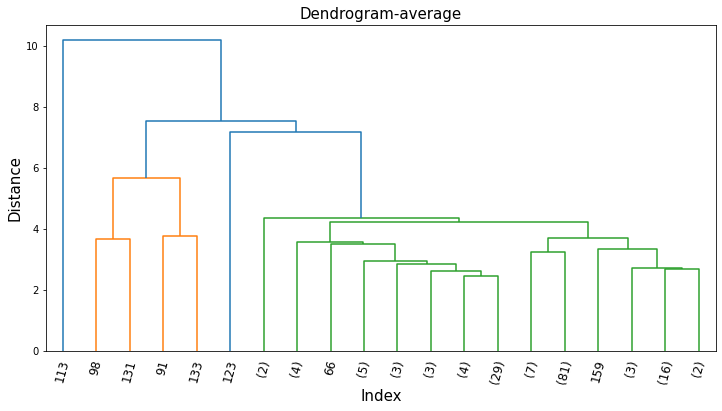

In [97]:
plt.title('Dendrogram-average', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

link=linkage(pca5_df,method='average')
dendrogram(link,leaf_rotation=75.,truncate_mode='lastp',p=20)

plt.show()

**Interpretation:** Clustering doesnt look meaningful. So we went with ward linkage method

#### Dendrogram with ward linkage

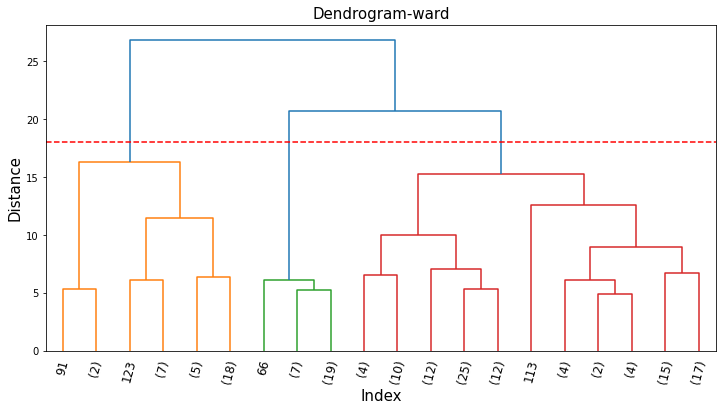

In [98]:
plt.title('Dendrogram-ward', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

link=linkage(X,method='ward')
dendrogram(link,leaf_rotation=75.,truncate_mode='lastp',p=20)

plt.axhline(y=18, c='red',ls='--')
plt.show()

**Interpretation**: From all the dendrogram plotting ward's linkage is able to cluster the data clearly.  We can see 3 clusters grouped well. So, we will be considering ward's linkage as the best linkage method.

##### Deciding the number of clusters using silhouette score.

In [99]:
n_cluster = [2,3,4,5]

for K in n_cluster:
    kmeans = AgglomerativeClustering(n_clusters=K)
    predict = kmeans.fit_predict(X)
    s_score = silhouette_score(pca5_df,predict,random_state=10)
    print("for {} clusters the silhouette score is {}".format(K,s_score) )

for 2 clusters the silhouette score is 0.3349277190980146
for 3 clusters the silhouette score is 0.2639985419517249
for 4 clusters the silhouette score is 0.2676058642390166
for 5 clusters the silhouette score is 0.24019387483311536


**Intrepretation**: From the above output for 2 clusters silhouette score is best that is 0.33.

But, from the dendrogram with ward's linkage k with 3 is giving the best clustering so, will consider 3 as the best number of clusters.

### Building model with number of clusters(k=3) and ward's linkage:

In [100]:
agglo_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_clust.fit(X)

AgglomerativeClustering(n_clusters=3)

In [101]:
set(agglo_clust.labels_)

{0, 1, 2}

**Interpretation:** We can see each record has got a label among 0,1,2.

In [102]:
country_agglo_df = country_df.copy()

In [103]:
country_agglo_df['clusters'] = agglo_clust.labels_

In [104]:
country_agglo_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


## Agglomerative-Cluster Analysis:

In [105]:
country_agglo_df['clusters'].value_counts()

1    106
0     34
2     27
Name: clusters, dtype: int64

#### Analysis of all Hierarchical-Clusters 

In [106]:
country_agglo_df.groupby(["clusters"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235
1,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925
2,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889


**Interpretation**:

Cluster 0 has low child mortality, high import and export, high gdp percapita and high income.Average life expectancy is 80. Average number of children that would be born to each woman is 1.

Cluster 1 has mediumn child mortality, medium import and export, medium gdpp and medium income.Average life expectancy is 71. Average number of children that would be born to each woman is 2.

Cluster 2 has high child mortality, low import and export, low gdpp and low income. Average life expectancy is 57.
Average number of children that would be born to each woman is 5



From above we can conclude that:-

**Cluster 0 = developed country, Cluster 1 = developing country,  Cluster 2 = under developing country**

From Agglomerative-clustering
- Number of developed countries 34

- Number of developing countries 106

- Number of under-developing countries 27

**27 Countries in cluster 2 needs the most economical support and development aid from NGO.**

## Grouping of countries and visualization

**Cluster 0 can be grouped as Developed countires**

In [107]:
# List of developed countries
developed=country_agglo_df[country_agglo_df['clusters']==0]
developed.index

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg',
       'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype='object', name='country')

**Cluster 1 can be grouped as Developing countires**

In [108]:
# List of developing countries
developing=country_agglo_df[country_agglo_df['clusters']==1]
developing.index

Index(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       ...
       'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen'],
      dtype='object', name='country', length=106)

**Cluster 2 can be grouped as Under-Developing countires**

In [109]:
# List of under-developed countries
under_developing=country_agglo_df[country_agglo_df['clusters']==2]
under_developing.index

Index(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Cote d'Ivoire', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya',
       'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
      dtype='object', name='country')

### Visualisation 

In [110]:
from plotly.offline import iplot
import plotly.graph_objects as go


fig_cases = go.Figure(data = go.Choropleth(locations = country_agglo_df.index,
                                     z = country_agglo_df['clusters'],
                                     locationmode = 'country names',
                                     colorscale = [[0, 'teal'],[0.5, 'gold'],[1, 'coral']],
                                     colorbar = {'title':'Clusters'},
                                     colorbar_title = "Clusters"))

fig_cases.update_layout(
                       title_text='Geographical representation of Developed/Developing/Under Developing for 167 countries',
                       geo = dict(showframe = True,showcoastlines = False)
                       )

iplot(fig_cases)

#### From Agglomerative-clustering:

1) `There are 34 countries in Cluster 0` in greenish color(characterised by showing positive values such as good economic development, high life expectancy, low child mortality) are located in North America, Australia, Europe and some part of Asia.

2) `There are 106 countries in Cluster 1` in gold color (characterised by showing average values for all features when comparing with other clusters) are located across South America, parts of Africa, Europe and Asia.

3) `There are 27 countries in Cluster 2` in reddish color (characterised by having the most negative values of high child mortality, lowest economic development) are located across most part of Africa and Afganisthan.  

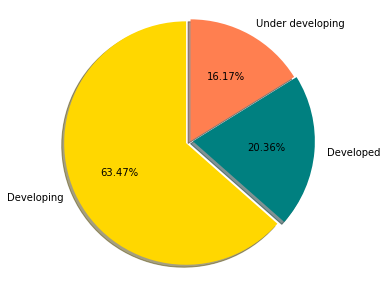

In [111]:
plt.figure(figsize=(5,5))
plt.pie(country_agglo_df.clusters.value_counts(), colors=[ 'gold', 'teal', 'coral'], explode=(0.04, 0.02, 0),
autopct='%1.2f%%', shadow=True, startangle=90, labels=['Developing','Developed','Under developing'])

plt.axis('equal')
plt.show()

**Interpretations:** 63% of countries are developing, 20% of countries are developing, 16% are under developed where the NGO's must focus on uplifting them with Infrastructure and financial support.

 -------------------------------------------

# DBSCAN(Density-Based Spatial Clustering of Application with Noise) 

DBSCAN is a density-based clustering method. It can create non-linear clusters.
This algorithm groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points.This method considers a high-density region as a cluster and the low-density points are considered as outliers(noise).
 
 
We do not need to provide the required number of clusters to the algorithm.

We find a suitable value for epsilon by calculating the distance to the nearest n points for each point.
We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [112]:
nn=NearestNeighbors(n_neighbors=4)
nn=nn.fit(X)
distances,indices=nn.kneighbors(X)

Next, we sort and plot results.

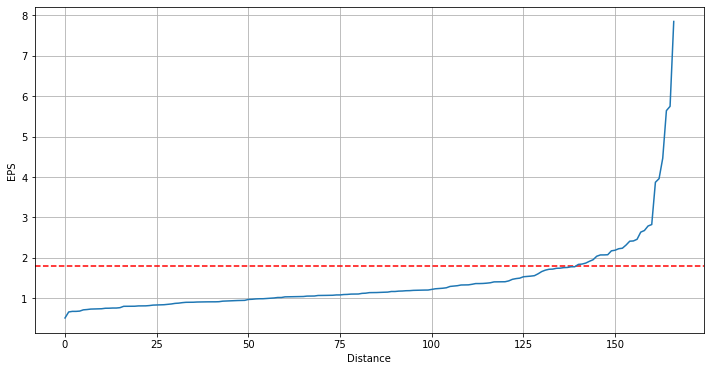

In [113]:
distances=np.sort(distances,axis=0)
distances=distances[:,3] #(take 3)
plt.ylabel("EPS")
plt.xlabel("Distance")
plt.axhline(y=1.8, c='red',ls='--')
plt.grid(True)
plt.plot(distances)
plt.show()

**Interpretations:**
The optimal value for epsilon will be found at the point of maximum curvature. We can observe above 1.8 the curve take a curvature.

### Silhouette score to fetch esp and min_sample values

In [114]:
for eps in [i/10 for i in range(10,20)]:
    for min_samples in range (2,5):
        print(f'\neps {eps}')
        print(f'min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(X)
        score = silhouette_score(X, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')
       


eps 1.0
min samples 2
clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11]
clusters sizes: [60  8 59 16  2  2  4  2  3  5  2  2  2]
Silhouette Score: -0.06803564496952418

eps 1.0
min samples 3
clusters present: [-1  0  1  2  3  4  5]
clusters sizes: [72  8 59 16  4  5  3]
Silhouette Score: 0.011714126637591617

eps 1.0
min samples 4
clusters present: [-1  0  1  2  3]
clusters sizes: [84 56 16  7  4]
Silhouette Score: -0.03186404135594062

eps 1.1
min samples 2
clusters present: [-1  0  1  2  3  4  5  6  7]
clusters sizes: [50 21 69 16  2  2  2  2  3]
Silhouette Score: -0.04080636114039233

eps 1.1
min samples 3
clusters present: [-1  0  1  2  3]
clusters sizes: [58 21 69 16  3]
Silhouette Score: 0.088628526180514

eps 1.1
min samples 4
clusters present: [-1  0  1  2]
clusters sizes: [64 20 67 16]
Silhouette Score: 0.11089719813010475

eps 1.2
min samples 2
clusters present: [-1  0  1  2  3  4]
clusters sizes: [39 25 78 19  4  2]
Silhouette Score: 0.13925482785733104

eps 1.2
mi

**Interpretation:** From the above output we can see that a Silouette score is maximum at eps =1.9 and minimum samples=4.

#### We build our model, selecting 1.9 for eps and setting min_samples to 4.

In [115]:
dbscan = DBSCAN(eps = 1.9, min_samples = 4)

dbscan.fit(X)

DBSCAN(eps=1.9, min_samples=4)

The labels_ property contains the list of clusters and their respective points.


In [116]:
set(dbscan.labels_)

{-1, 0}

In [117]:
country_dbscan_df = country_df.copy()

In [118]:
country_dbscan_df['clusters'] = dbscan.labels_

In [119]:
country_dbscan_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


### Scatter plots to to observe clusters

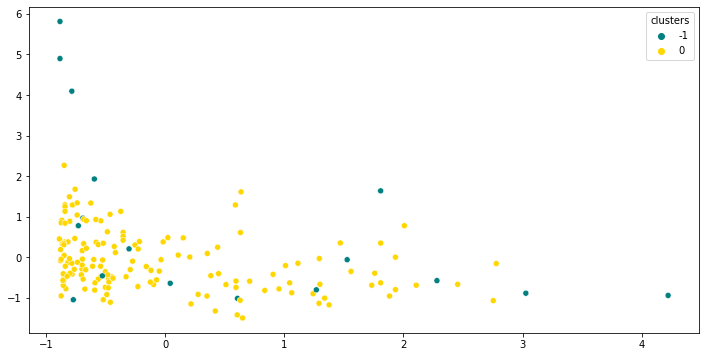

In [120]:
sns.scatterplot(X[:,0], X[:,1], hue=country_dbscan_df['clusters'],palette=['Teal','gold'])
plt.show()

**Interpretation**: From the above graph we can see that the DBSCAN algorithm has created 2 clusters. The data points labeled as -1 are the outliers identified by DBSCAN.

In [121]:
country_dbscan_df['clusters'].value_counts()

 0    150
-1     17
Name: clusters, dtype: int64

**Interpretation:** From the above output we can see that a cluster with 150 is the largest cluster and 17 are grouped grouped as outlier.

### Analysist of clusters

In [122]:
country_dbscan_df.groupby(["clusters"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
-1,58.676471,63.388235,7.920000,73.523529,31848.823529,16.452000,66.852941,3.085882,22352.235294
0,35.957333,38.583993,6.690533,43.871773,15478.220000,6.799213,70.975333,2.932333,11900.173333


**Interpretation**:

Appears like clustering happened based on  extreme values of gdpp, income, import and export values.

Cluster 0 has low import and export rates, low gdp percapita and low income. 


Cluster -1 has high import and export rates, high gdpp and high income.



#### Analysing the outliers

In [123]:
country_dbscan_df[country_dbscan_df.clusters==-1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
country,,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,-1
Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,-1
Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,-1
Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,-1
Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,-1
Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327,-1
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,-1
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,-1
"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,-1


**Interpretations:**

Haiti, Sierra Leone, Nigeria the death rate of children under 5 years is high.

Brunei, Qatar,Luxembourg,Singapore has the highest income group.

Singapore,Malta,Luxembourg generate good percentage of revenue in exports aswell as trade high imports.

As per this data Inflation rate is exponentially high in Nigeria which can be considered as extreme outlier.

Luxembourg is the richest country with an average GDP per capita of 105000 USD.

**So some of the highly developed countries and least developed countries are grouped as outliers here.**


---------------------------------------------------

### 3D-analysis

We will visualize 3 clusters now for "GDPP", "income", "inflation". Since we are concerned about analyzing country profiles and "GDPP" is the main indicator to represent a country's economical status.

In [124]:
plt.rcParams['figure.figsize'] = (20,8)
fig = px.scatter_3d(country_agglo_df, x='income', y='inflation', z='gdpp', size_max=30,
                    color='clusters')
fig.show()

**Interpretation**:

Income is heavily correlated to GDPP and Inflation is inversely proportional to GDPP.

We can observe that the high income and low inflation  have high GDPP and is grouped in blue color( developed countries).
Medium income and medium inflation are grouped in medium GDPP in purple color(developing countries).
Low  GDPP, low income are grouped in yellow cluster( under developing countries).

------------------------------------------------

### Let's check if India is present in developing countries list!

In [125]:
for i in developing.index:
    if i == 'India':
        print('Yes', i , 'is present in developing countries list')   
        

Yes India is present in developing countries list


### Top 10 underdeveloping countries

Deciding which country from the selected cluster will receive financial help can be made easy by listing the top 10 countries with the highest Child Mortality ,life expectancy, income, gdpp.
It's a good indication of who deserves more this financial help.

#### List of poor countries

In [126]:
poor10_country=(country_agglo_df[country_agglo_df['clusters']== 2].sort_values(['gdpp','income','life_expec','child_mort'],
                                                                    ascending=[True,True,True,False]).head(10))

poor10_country

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
country,,,,,,,,,,
Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2
Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2
Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2
Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2
Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2
Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2
Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2
Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,2


**Interpretation**:

Most of these African countries were considered underdeveloped based on a variety of characteristics
like low economic development, low life expectancy, early death of children, high rates of poverty and disease, etc.

Child mortality rate is very high and life expectancy is less than 60 years.

#### These 10 countries requires the most support from NGO on health and financial needs. 


--------------------------------------------------------------

## Summary 

After grouping all the countries into 3 groups by using some socio-economic and health factors, we can determine the overall development of the countries.

Here, the countries are categorised into list of developed countries, developing countries and under-developed countries.

- In Developed countries, we can see the GDP per capita and income is high where as Death of children under 5 years of age per 1000 live births i.e. child-mort is very low, which is expected.

- In Developing countries the GDP per capita and income are moderate, and child-mort is moderate. Life expectancy is average.

- In under-developed countries,  like Haiti, Sierra Leone, Chad, etc., the death rate of children under 5 years is high. Hence the women are giving birth to more children if the previous ones didn't survive unfortunately. 
Countries like Burundi, Congo, Niger, etc., GDP per capita is very low & the income per person is also low. So, these countries are considered as Least developed countries.


## Conclusion

#### Facts from source https://www.investopedia.com/updates/top-developing-countries/

**According to the UN, in 2020,**

- 35 countries were considered "developed." All developed countries were located in either North America, Europe, or "Developed Asia and Pacific.



- 126 countries were considered "developing." All developing countries were located in either Africa, Asia, or Latin America and the Caribbean.



- 33 countries were considered "least developed." All developed countries were located in either Africa, and the Small Island Developing States.

Some of the countries not listed in our dataset too.

#### From Kmeans-clustering

Number of developed countries 36

Number of developing countries 84

Number of under-developing countries 47

#### From Agglomerative-clustering 

Number of developed countries 34

Number of developing countries 106

Number of under-developing countries 27

**We can come to a conclusion that Agglomerative clustering is nearest to the estimation.**


-------------

### Some Suggestions to NGO based on our clustering method

Using ML we clustered to Allocate Funding for Development Aid for the third world or Least developed countries those who are in more need of the money since income and healthcare expenditure were one of the major distinguishing factors of the clustering.

1) If Child Mortality Rate is decreased and (GDPP , Income) is increased in Under-developed countries, the need will be resolved.

2) Like Developed countries are spending on health which showed increase in GDPP. NGOs should contribute in the health system by providing medical services and health advocacies in those afflicted countries that would help in decrease of  Child Mortality Rate and enhance life expectancy. 

3) A country's importing and exporting activity can influence its GDP, its exchange rate, and its level of inflation and interest rates. So NGO can promote manufacturing units  in those less productive countries to increase in export of products and create employment aswell indeed increase the income per capita.

4) Apart from the features provided in the dataset The natural resources plays a key role in our economy as a direct input into production and export. NGO's need to focus on healthy environment and healthy population which is the Key for progress of a nation!. 